# Importing Essential Libraries

In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
import numpy as np

# Loading the Dataset

In [29]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [31]:
x_train, y_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [32]:
len(x_train)

60000

In [34]:
len(x_test)

10000

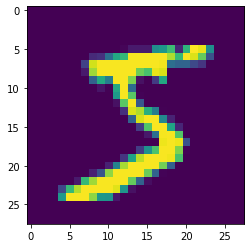

In [20]:
plt.imshow(x_train[0])

# Scaling the Dataset

In [21]:
x_train = x_train/255
x_test = x_test/255

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [24]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

# Creating a Neural Network

In [25]:
model = models.Sequential([
    layers.Conv2D(filters=12,kernel_size=(3,3),activation = 'relu',input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=12,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [26]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2206 - accuracy: 0.9330: 40s - loss: 2.0401 - accuracy: 0. - ETA: 42s - loss: 1.9380 - accuracy: 0.42 - ETA: 43s - ETA: 48s - loss: 0.8469 - accuracy: 0.74 - ETA: 48s - loss: 0.8383 - accura 
Epoch 2/2
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0757 - accuracy: 0.9769: 37s - loss: 0. - ETA: 19s - loss: 0.079  - ETA: - ETA: 10s - loss: 0.0784 -  - ETA: 3s - loss: 0.0760 - accuracy: 0. - - - ETA: 0s - loss: 0.0757 - accuracy:  - ETA: 0s - loss:


In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0666 - accuracy: 0.9783


[0.06661560386419296, 0.9782999753952026]

### 98% Accuracy on test dataset

In [10]:
from sklearn.metrics import classification_report

In [11]:
y_pred = model.predict(x_test)

In [12]:
y_predi = [np.argmax(element) for element in y_pred]

In [13]:
y_predi[:5]

[7, 2, 1, 0, 4]

# Classification Report of our Model

In [14]:
print(classification_report(y_test,y_predi))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.93      1.00      0.96      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       1.00      0.97      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### This concludes that our model has an acuracy of about 98% with excellent Classification Report